Numpy - библиотека для работы с массивам

matplotlib.pyplot - для посторения графиков

In [143]:
import numpy as np 

import matplotlib.pyplot as plt

Сгенерируем датасет - несколько точек из кривой $ y = x^3 + 2x^2 + 4 + \epsilon$, где $\epsilon$ случайный шум с нулевым средним. Для этого создаем точки по х от 0 до 20 с равным интервалом с помощью np.linspace, потом считаем y и прибавляем шум с помощью np.random.normal


Описание функций numpy можно либо нагуглить, либо посмотреть поставив курсор внутрь скобок и нажав shift + tab



In [15]:
x = np.linspace(0, 2, 20)
y_true = x**3 + 2*x**2 + 4
y = y_true + np.random.normal(0, 1, x.shape[0])

Строим график. Точки - наш датасет, кривая - исходная зависимость без шума.

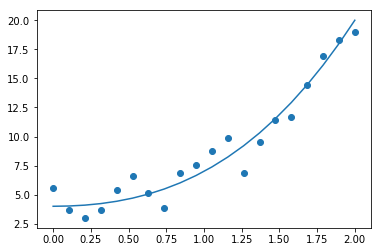

In [144]:
plt.scatter(x, y)
plt.plot(x, y_true)

## Linear regression

Предполагаем, что мы не знаем исходную зависимость и пытаемся ее восстановить с помощью известных моделей.

В библиотеке sklearn большинство моделей о которых мы говорим уже есть. Чтобы воспользоваться линейной регрессией просто импортируем ее из sklearn. 

Документация с подробными примерами тут http://scikit-learn.org/stable/index.html

В целом большая часть кода подразумевает объектно ориентированный стиль. По большому счету это означает, что если мы хотим обучить какую-то модель, мы создаем объект этой модели на основе некоторого шаблона(класса) который либо пишем сами, либо берем из библиотеки. 
Дальше эта модель хранит в себе все необходимые параметры (например $\theta$). <br>
У любого объекта есть функции, принадлежащие ему, т.н. методы. Они пишутся после точки, например: <br>
object.method_of_the_object()


Дальше все описанное выше на примере линейной регрессии

Импортируем класс линейной регрессии. (шаблон для создания объектов линейной регрессии)

In [195]:
from sklearn.linear_model import LinearRegression

Создаем объект линейной регрессии - lr

In [28]:
lr = LinearRegression()

Превращем х из строки в столбец, чтобы модель регрессии понимала, что у нас 20 примеров и одна фича, а не наоборот. Для этого используется метод который есть у массивов из numpy - reshape. 

In [145]:
x = x.reshape((20, 1))

Обучаем модель на данных с помощью метода fit. 

In [146]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Теперь посмотрим как выглядят предсказания модели для тех же самых х. Делаем это с помощью метода predict

In [154]:
y_pred = lr.predict(x)

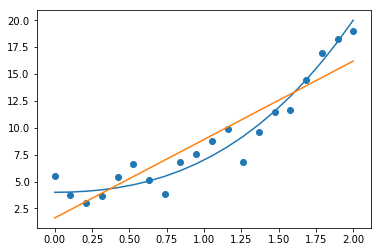

In [155]:
plt.plot(x, y_true)
plt.plot(x, y_pred)
plt.scatter(x, y)
    

Построилась рыжая прямая. Не очень хорошо

## Нелинейная модель

Напишем функцию, которая добавляет к х степени х. Для этого сначала сделаем список, где к-тый элемент - столбец с $x^k$. Потом с помощью np.hstack склеим все в один двемрный массив

In [149]:
def add_powers(x, n_powers):
    return np.hstack([x**i for i in range(n_powers)])

Делаем новый датасет со степенями х до 20

In [152]:
x_poly = add_powers(x, 20)

проверяем, что у него правильная форма

In [153]:
x_poly.shape

(20, 20)

Теперь как и выше создаем объект линейной регрессии, обучаем

In [156]:
lr_poly = LinearRegression()
lr_poly.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Напишем функцию для построения графиков, можно не вдаваться в детали. 

In [172]:
def plot_model(model, x=x, y=y, y_true=y_true, power=1):
    _x_plot = np.linspace(0,2,200).reshape((200,1))
    _x_poly_plot = add_powers(_x_plot, power)
    

    y_pred = model.predict(_x_poly_plot)
    
    plt.ylim((0,20))
    plt.plot(x, y_true)
    plt.plot(_x_poly_plot[:,1], y_pred)
    plt.scatter(x, y)
    

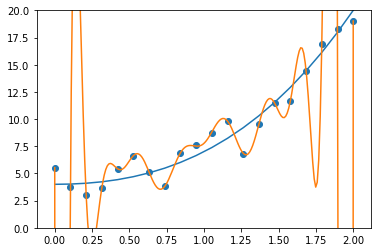

In [173]:
plot_model(lr_poly, power=20)

Это переобучение! Посмотрим на максимальный коэффициент у модели обученной на степенях х и у линейной модели. Коэффициенты модели можно посмотреть с помощью model.coef_

In [174]:
np.abs(lr_poly.coef_).max()

4736098334.128432

In [175]:
np.abs(lr.coef_).max()

7.290966992298646

Огромный коэффициент у переобучившейся модели. Посмотрим, как с этим справится регуляризация.

## Смотрим Ridge regression

Первым параетром в такую модель передается $\alpha$ - коэффициент регяляризации

In [176]:
from sklearn.linear_model import Ridge

In [177]:
ridge = Ridge(alpha=1)
ridge.fit(x_poly, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

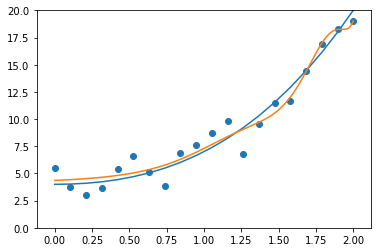

In [178]:
plot_model(ridge, power=20)

отлично! 

теперь максимальный коэффициент

In [179]:
np.max(np.abs(ridge_1.coef_))

0.7690396418084317

Посмотрим на влияние разных $\alpha$

alpha =  1.0


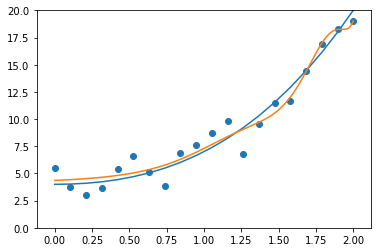

alpha =  10.0


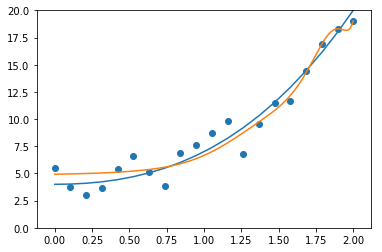

alpha =  100.0


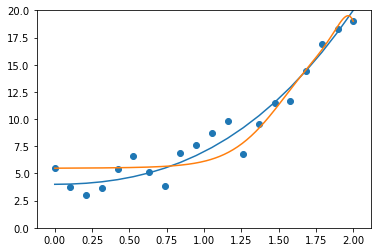

alpha =  1000.0


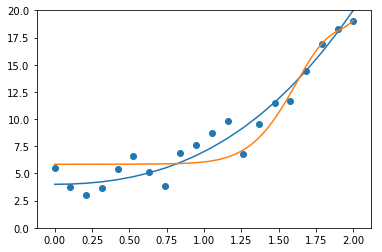

In [181]:
for alpha in np.logspace(0, 3, 4):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_poly, y)
    
    print('alpha = ', alpha)
    plot_model(ridge, power = 20)
    plt.show()

## Lasso regression

Делаем тоже самое

In [182]:
from sklearn.linear_model import Lasso

In [184]:
lasso = Lasso()
lasso.fit(x_poly, y)


/home/anton/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

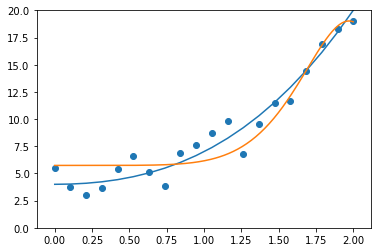

In [185]:
plot_model(lasso, power=20)

Неплохо. Посмотрим на кол-во ненулевых коэффициентов

In [188]:
(lasso.coef_ != 0).astype(int).sum()

12

Давайте обрежем датасет. Сделаем не 20 степеней, а 5 (для этого используем праильную индексацию x\[:,:5\]) и обучим на таком датасете модели с разным $\alpha$

alpha =  0.1


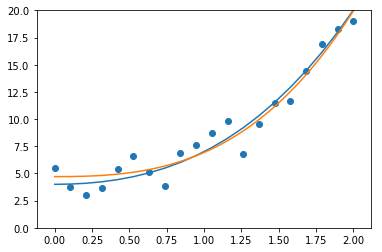

alpha =  0.46415888336127786


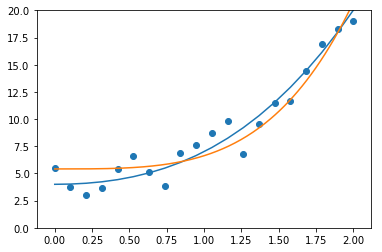

alpha =  2.1544346900318834


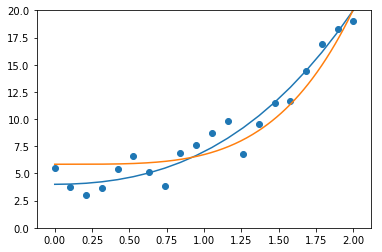

alpha =  10.0


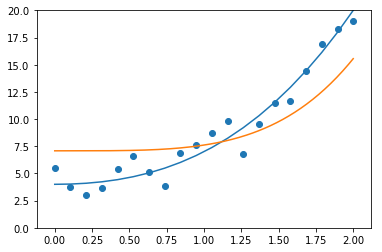

In [194]:
for alpha in np.logspace(-1, 1, 4):
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_poly[:,:5], y)
    
    print('alpha = ', alpha)
    plot_model(lasso, power = 5)
    plt.show()

Какие выводы:
- Много фичей в виде степеней(попарных произведений) исходных данных с большой вероятностью даст переобученную модель
- регуляризация работает, но надо подбирать $\alpha$
- Lasso отбирает фичи 

Мы нигде не делали кросс-валидацию. Все модели оценивали визуально. В реальной жизни, чтобы понять что произошло переобучение, надо использовать кросс-валидацию.